In [1]:
import os
import google.generativeai as genai

from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY = os.getenv("GEMINI_API_KEY")

genai.configure(api_key=os.environ["GEMINI_API_KEY"])

GENERATIVE_MODEL_NAME = "gemini-1.5-flash"

model = genai.GenerativeModel(GENERATIVE_MODEL_NAME)


In [ ]:
import os
import json

def get_json_files(root_dir):
    """
    Recursively searches a directory and returns a list of paths to all JSON files.

    Args:
        root_dir: The path to the root directory.

    Returns:
        A list of strings, where each string is the absolute path to a JSON file.
        Returns an empty list if no JSON files are found or if the directory doesn't exist.
    """

    json_files = []

    if not os.path.exists(root_dir):
        print(f"Error: Directory '{root_dir}' does not exist.")
        return json_files

    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith(".json"):  # Case-insensitive check
                file_path = os.path.join(dirpath, filename)
                json_files.append(file_path)

    return json_files


# Example usage:
directory_path = "/Users/vince/Salk/NeuroCircadia/data/uptodate/table-of-contents"
json_file_paths = get_json_files(directory_path)


In [6]:
import random

sampled_paths = random.sample(json_file_paths, 100)

In [10]:
def load_json(path):
    try:
        with open(path, 'r') as f:
            return json.load(f)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON in file {path}: {e}")
    except FileNotFoundError:
        print(f"File not found: {path}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

data = load_json(sampled_paths[0])
data

[{'content': '# Approach to the patient with abnormal liver tests\n# Approach to the patient with abnormal liver tests\n',
  'references': [],
  'metadata': {'title': 'Approach to the patient with abnormal liver tests',
   'topic': 'Obstetrics gynecology and womens health',
   'subtopic': 'Critical care obstetrics'}},
 {'content': '# Approach to the patient with abnormal liver tests\n## INTRODUCTION\n\nAbnormal liver tests are frequently detected in asymptomatic patients since many screening blood test panels routinely include them [1]. A population-based survey in the United States conducted between 1999 and 2002 estimated that an abnormal alanine aminotransferase (ALT) was present in 8.9 percent of respondents. Although the term "liver function tests" (LFTs) is used commonly, it is imprecise and potentially misleading since many of the tests reflecting the health of the liver are not direct measures of its function. Furthermore, the commonly used liver biochemical tests may be abnorm

In [ ]:
import pandas as pd

all_dfs = [] # List to store all the dataframes
for path in sampled_paths:
    data = load_json(path)
    if data: # Check if data is not None (i.e., loading was successful)
        try:
            df = pd.DataFrame(data)
            df['source_file'] = path # Add a column with the source file
            all_dfs.append(df)

        except ValueError as e: # Handle cases where data isn't in the expected format
            print(f"Error creating DataFrame from {path}: {e}. Data might not be in the expected list of dictionaries format.")
            print(f"Data type: {type(data)}") # Print the data type for debugging
            if isinstance(data, list):
                if len(data) > 0:
                    print(f"First element type: {type(data[0])}")
                else:
                    print("Data list is empty")
            print(f"First 500 characters of data:\n{str(data)[:500]}") # Print first part of data for inspection
        except Exception as e:
            print(f"An unexpected error occurred when creating dataframe: {e}")
    else:
        print(f"Could not load json from path: {path}")
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True) #Combine all into one
    print("Combined DataFrame shape:", combined_df.shape)
    print(combined_df.head()) #Print head of dataframe

Combined DataFrame shape: (983, 4)
                                             content  \
0  # Approach to the patient with abnormal liver ...   
1  # Approach to the patient with abnormal liver ...   
2  # Approach to the patient with abnormal liver ...   
3  # Approach to the patient with abnormal liver ...   
4  # Approach to the patient with abnormal liver ...   

                                          references  \
0                                                 []   
1  [[1] Pratt DS, Kaplan MM. Evaluation of abnorm...   
2  [[4] Liangpunsakul S, Chalasani N. What should...   
3  [[2] Kwo PY, Cohen SM, Lim JK. ACG Clinical Gu...   
4  [[28] Sorbi D, McGill DB, Thistle JL, et al. A...   

                                            metadata  \
0  {'title': 'Approach to the patient with abnorm...   
1  {'title': 'Approach to the patient with abnorm...   
2  {'title': 'Approach to the patient with abnorm...   
3  {'title': 'Approach to the patient with abnorm...   
4  {'title'

In [ ]:
import numpy as np 

def get_embedding(text):
    try:
        if isinstance(text, str) and text.strip(): #Check if is string and not empty
          return genai.embed_content(model="models/text-embedding-004", content=text)['embedding']
        else:
          return np.nan # Return empty array for empty or non-string inputs
    except Exception as e:
        print(f"Error embedding text: {e}")
        return np.nan
    
combined_df['content_embedding'] = combined_df['content'].apply(get_embedding)

Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size exceeds the limit: 10000 bytes.
Error embedding text: 400 Request payload size excee

In [33]:
combined_df['content_len'] = combined_df['content'].apply(len)


In [34]:
combined_df

,content,references,metadata,source_file,content_embedding,content_len
0,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.037059393, -0.024424931, 0.01526159, -0.072...",104
1,# Approach to the patient with abnormal liver ...,"[[1] Pratt DS, Kaplan MM. Evaluation of abnorm...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.011740726, 0.0013572399, -0.04084889, -0.03...",2607
2,# Approach to the patient with abnormal liver ...,"[[4] Liangpunsakul S, Chalasani N. What should...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,NaN,10989
3,# Approach to the patient with abnormal liver ...,"[[2] Kwo PY, Cohen SM, Lim JK. ACG Clinical Gu...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,NaN,11076
4,# Approach to the patient with abnormal liver ...,"[[28] Sorbi D, McGill DB, Thistle JL, et al. A...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.005286761, 0.036727812, -0.09543803, -0.04...",7145
...,...,...,...,...,...,...
978,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.022444487, 0.034727115, -0.014908144, -0.03...",138
979,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.02065271, 0.024646694, -0.018300625, -0.029...",753
980,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.052564584, 0.012654385, -0.050699987, -0.02...",2869
981,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.041679755, 0.01428603, -0.030871421, -0.002...",9112


In [35]:
def get_question(content):
    try:
        if isinstance(content, str) and content.strip():
            prompt = f"""You are a helpful assistant designed to generate Jeopardy-style questions.

            Given the following "answer" (content), generate a question that this content would answer. The question should be concise, clear, and directly related to the provided content. Avoid vague or overly broad questions.

            Content:
            ```
            {content}
            ```

            Jeopardy-style Question:"""

            response = genai.GenerativeModel(GENERATIVE_MODEL_NAME).generate_content(prompt)
            return response.text.strip() # Return the generated question
        else:
            return np.nan
    except Exception as e:
        print(f"Error generating question: {e}")
        return np.nan
    
combined_df['generated_question'] = combined_df['content'].apply(get_question)

In [36]:
combined_df['generated_question_embedding'] = combined_df['generated_question'].apply(get_embedding)

In [37]:
combined_df

,content,references,metadata,source_file,content_embedding,content_len,generated_question,generated_question_embedding
0,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.037059393, -0.024424931, 0.01526159, -0.072...",104,What medical procedure or strategy is the subj...,"[0.008545932, -0.0019114971, 0.01774706, -0.03..."
1,# Approach to the patient with abnormal liver ...,"[[1] Pratt DS, Kaplan MM. Evaluation of abnorm...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.011740726, 0.0013572399, -0.04084889, -0.03...",2607,What medical procedure's initial evaluation in...,"[0.007934969, 0.00462458, 0.022376265, -0.0411..."
2,# Approach to the patient with abnormal liver ...,"[[4] Liangpunsakul S, Chalasani N. What should...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,NaN,10989,What initial steps are taken in evaluating a p...,"[0.012301508, -0.019593237, -0.0076593193, -0...."
3,# Approach to the patient with abnormal liver ...,"[[2] Kwo PY, Cohen SM, Lim JK. ACG Clinical Gu...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,NaN,11076,What is the approach to a patient presenting w...,"[0.035294708, 0.006958067, 0.010500904, -0.051..."
4,# Approach to the patient with abnormal liver ...,"[[28] Sorbi D, McGill DB, Thistle JL, et al. A...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.005286761, 0.036727812, -0.09543803, -0.04...",7145,"What diagnostic test, when elevated along with...","[-0.017528424, 0.03681118, -0.049173795, -0.05..."
...,...,...,...,...,...,...,...,...
978,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.022444487, 0.034727115, -0.014908144, -0.03...",138,What is the subject of these duplicated societ...,"[0.01765338, 0.06567433, -0.038165696, 0.01164..."
979,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.02065271, 0.024646694, -0.018300625, -0.029...",753,"What type of resource, periodically updated, ...","[0.03178909, -0.019632597, 0.0014273225, -0.00..."
980,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.052564584, 0.012654385, -0.050699987, -0.02...",2869,"What organizations, both international and nat...","[0.06831281, -0.0054750605, 0.0365693, -0.0120..."
981,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.041679755, 0.01428603, -0.030871421, -0.002...",9112,"What type of medical guidelines, issued during...","[0.047984555, -0.016422687, 0.0078091985, -0.0..."


In [41]:
from sentence_transformers import util
import numpy as np
import ast

def string_to_embedding(embedding_str): #New function to convert strings to embeddings
    try:
        if isinstance(embedding_str, str) and embedding_str.strip():
            embedding_list = ast.literal_eval(embedding_str) #Safely evaluate string
            return np.array(embedding_list)
        elif isinstance(embedding_str, list) and len(embedding_str) > 0 and isinstance(embedding_str[0], float):
            return np.array(embedding_str)
        elif isinstance(embedding_str, np.ndarray):
            return embedding_str
        else:
            return np.array([])
    except (ValueError, SyntaxError, TypeError):
        return np.array([])

def calculate_similarity(row):
    try:
        question_embedding = row['generated_question_embedding']
        content_embedding = row['content_embedding']

        if isinstance(question_embedding, np.ndarray) and question_embedding.size > 0 and isinstance(content_embedding, np.ndarray) and content_embedding.size > 0:
            similarity = util.cos_sim(question_embedding, content_embedding).item()
            return similarity
        else:
            return np.nan # Return NaN if embeddings are empty or not arrays
    except Exception as e:
        print(f"Error calculating similarity: {e}")
        return np.nan
    
# Convert string representations of embeddings to actual NumPy arrays
combined_df['content_embedding'] = combined_df['content_embedding'].apply(string_to_embedding)
combined_df['generated_question_embedding'] = combined_df['generated_question_embedding'].apply(string_to_embedding)
    
combined_df['similarity'] = combined_df.apply(calculate_similarity, axis=1)

In [51]:
combined_df['generated_question_len'] = combined_df['generated_question'].apply(len)

In [52]:
chunk_df = combined_df[~combined_df['similarity'].isna()]
chunk_df

,content,references,metadata,source_file,content_embedding,content_len,generated_question,generated_question_embedding,similarity,generated_question_len
0,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.037059393, -0.024424931, 0.01526159, -0.072...",104,What medical procedure or strategy is the subj...,"[0.008545932, -0.0019114971, 0.01774706, -0.03...",0.762303,120
1,# Approach to the patient with abnormal liver ...,"[[1] Pratt DS, Kaplan MM. Evaluation of abnorm...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.011740726, 0.0013572399, -0.04084889, -0.03...",2607,What medical procedure's initial evaluation in...,"[0.007934969, 0.00462458, 0.022376265, -0.0411...",0.704637,258
4,# Approach to the patient with abnormal liver ...,"[[28] Sorbi D, McGill DB, Thistle JL, et al. A...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.005286761, 0.036727812, -0.09543803, -0.04...",7145,"What diagnostic test, when elevated along with...","[-0.017528424, 0.03681118, -0.049173795, -0.05...",0.731656,174
5,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.005307468, 0.0323028, -0.06725429, -0.03674...",1169,"What enzyme, elevated in conditions ranging fr...","[0.0038997608, 0.04860894, -0.009117334, -0.00...",0.702881,268
6,# Approach to the patient with abnormal liver ...,"[[30] Watson KJ, Gollan JL. Gilbert's syndrome...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.003572605, 0.024166785, -0.046526484, -0.0...",2913,What initial step is crucial in evaluating a p...,"[0.041176125, 0.0310344, -0.023328893, -0.0412...",0.726436,190
...,...,...,...,...,...,...,...,...,...,...
978,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.022444487, 0.034727115, -0.014908144, -0.03...",138,What is the subject of these duplicated societ...,"[0.01765338, 0.06567433, -0.038165696, 0.01164...",0.566786,64
979,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.02065271, 0.024646694, -0.018300625, -0.029...",753,"What type of resource, periodically updated, ...","[0.03178909, -0.019632597, 0.0014273225, -0.00...",0.815863,152
980,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.052564584, 0.012654385, -0.050699987, -0.02...",2869,"What organizations, both international and nat...","[0.06831281, -0.0054750605, 0.0365693, -0.0120...",0.800457,117
981,# Society guideline links: COVID-19 – Oncology...,[],{'title': 'Society guideline links: COVID-19 –...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.041679755, 0.01428603, -0.030871421, -0.002...",9112,"What type of medical guidelines, issued during...","[0.047984555, -0.016422687, 0.0078091985, -0.0...",0.712425,200


In [50]:
from rich import print as rprint
for i, row in chunk_df.sort_values('similarity', ascending=False).head().iterrows():
    print(f"Question: {row['generated_question']}")
    print(f"Content: {row['content']}")
    rprint(f"Similarity: {row['similarity']}")

Question: What is the effect of antidepressants on suicide risk in adults?
Content: # Effect of antidepressants on suicide risk in adults
# Effect of antidepressants on suicide risk in adults



Similarity: 0.9711870992364551

Question: What type of autoinflammatory diseases are mediated by interferon production and signaling?
Content: # Autoinflammatory diseases mediated by interferon production and signaling (interferonopathies)
# Autoinflammatory diseases mediated by interferon production and signaling (interferonopathies)



Similarity: 0.9414003487173996

Question: What aspects of neuroblastoma are covered in a clinical presentation, diagnosis, and staging evaluation?
Content: # Clinical presentation, diagnosis, and staging evaluation of neuroblastoma
# Clinical presentation, diagnosis, and staging evaluation of neuroblastoma



Similarity: 0.9234773111969932

Question: What symptoms characterize a meningococcal infection?
Content: # Clinical manifestations of meningococcal infection
# Clinical manifestations of meningococcal infection



Similarity: 0.9188218745738346

Question: What type of anesthesia is a concern for patients with aortic or mitral valve disease undergoing noncardiac surgery?
Content: # Anesthesia for noncardiac surgery in patients with aortic or mitral valve disease
# Anesthesia for noncardiac surgery in patients with aortic or mitral valve disease



Similarity: 0.9168355861609974

In [53]:
from rich import print as rprint
for i, row in chunk_df.sort_values('similarity', ascending=False).tail().iterrows():
    print(f"Question: {row['generated_question']}")
    print(f"Content: {row['content']}")
    rprint(f"Similarity: {row['similarity']}")

Question: What medical condition's treatment strategy is the subject of this presentation title?
Content: # Approach to older males with low testosterone
# Approach to older males with low testosterone



Similarity: 0.47422201125791197

Question: What medical condition is the subject of a clinical features and diagnosis study?
Content: # Kawasaki disease: Clinical features and diagnosis
# Kawasaki disease: Clinical features and diagnosis



Similarity: 0.46554937074594105

Question: What condition's management is the subject of this medical text?
Content: # Undescended testes (cryptorchidism) in children: Management
# Undescended testes (cryptorchidism) in children: Management



Similarity: 0.4443803292324865

Question: What condition's treatment is the subject of this medical text?
Content: # Treatment of rheumatoid vasculitis
# Treatment of rheumatoid vasculitis



Similarity: 0.42107110193742286

Question: What condition's clinical manifestations and diagnosis are the subject of this medical text?
Content: # Intrauterine adhesions: Clinical manifestation and diagnosis
# Intrauterine adhesions: Clinical manifestation and diagnosis



Similarity: 0.41157489155943694

Correlation between similarity and length difference: -0.18981525451139034


/var/folders/dv/lndb9rrs2kv2v5g8cyfyx0wr0000gn/T/ipykernel_78817/869841353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df['length_difference'] = abs(chunk_df['content_len'] - chunk_df['generated_question_len'])


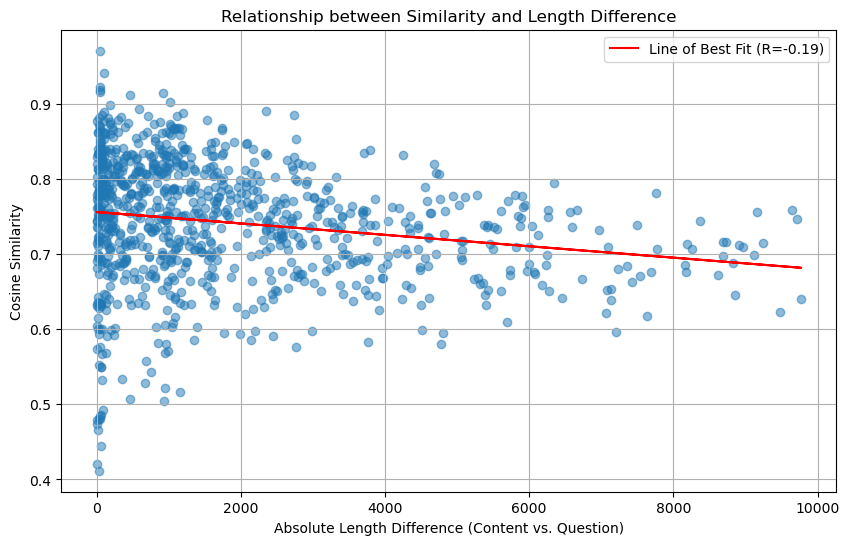

/var/folders/dv/lndb9rrs2kv2v5g8cyfyx0wr0000gn/T/ipykernel_78817/869841353.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df['length_difference_quantile'] = pd.qcut(chunk_df['length_difference'], q=4, labels=False, duplicates='drop') #Create quantiles



Descriptive Statistics of Similarity by Length Difference Quantile:
                            count      mean       std       min       25%  \
length_difference_quantile                                                  
0                           232.0  0.747312  0.106264  0.411575  0.693814   
1                           231.0  0.755141  0.083856  0.504679  0.698591   
2                           231.0  0.749480  0.068930  0.516122  0.705799   
3                           231.0  0.716491  0.056006  0.576336  0.676685   

                                 50%       75%       max  
length_difference_quantile                                
0                           0.768897  0.822972  0.971187  
1                           0.771151  0.816162  0.914449  
2                           0.755342  0.798625  0.890485  
3                           0.716065  0.756425  0.885733  


<Figure size 800x600 with 0 Axes>

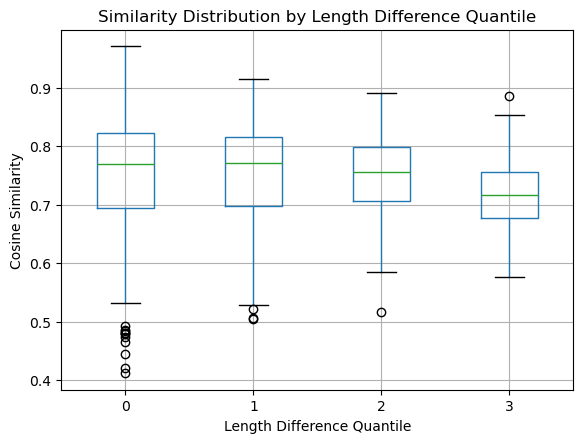

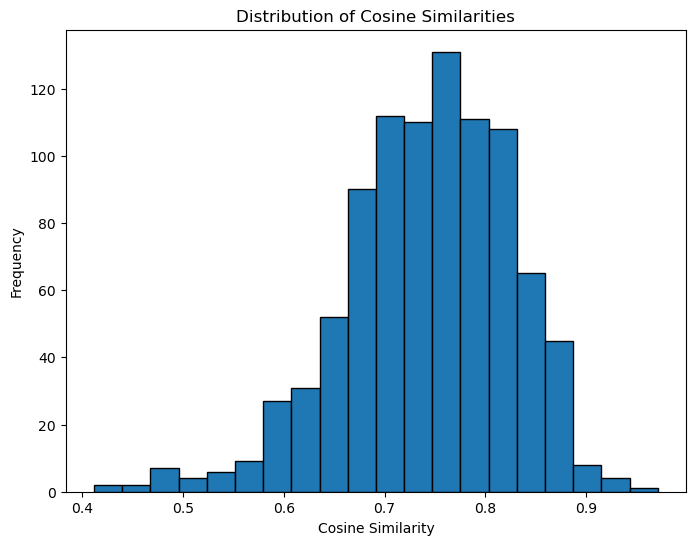

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Calculate length difference
chunk_df['length_difference'] = abs(chunk_df['content_len'] - chunk_df['generated_question_len'])


# Correlation analysis
correlation = chunk_df['similarity'].corr(chunk_df['length_difference'])
print(f"Correlation between similarity and length difference: {correlation}")


# Scatter plot with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(chunk_df['length_difference'], chunk_df['similarity'], alpha=0.5)

# Calculate and plot the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(chunk_df['length_difference'], chunk_df['similarity'])
line = slope * chunk_df['length_difference'] + intercept
plt.plot(chunk_df['length_difference'], line, color='red', label=f'Line of Best Fit (R={r_value:.2f})')

plt.xlabel('Absolute Length Difference (Content vs. Question)')
plt.ylabel('Cosine Similarity')
plt.title('Relationship between Similarity and Length Difference')
plt.legend()
plt.grid(True)
plt.show()

# Further analysis: descriptive statistics of similarity based on length difference quantiles.
chunk_df['length_difference_quantile'] = pd.qcut(chunk_df['length_difference'], q=4, labels=False, duplicates='drop') #Create quantiles

print("\nDescriptive Statistics of Similarity by Length Difference Quantile:")
print(chunk_df.groupby('length_difference_quantile')['similarity'].describe())

# Boxplot of similarity by length difference quantile
plt.figure(figsize=(8, 6))
chunk_df.boxplot(column='similarity', by='length_difference_quantile')
plt.title('Similarity Distribution by Length Difference Quantile')
plt.xlabel('Length Difference Quantile')
plt.ylabel('Cosine Similarity')
plt.suptitle('') # Remove default title
plt.show()

#Histogram of similarities
plt.figure(figsize=(8, 6))
plt.hist(chunk_df['similarity'].dropna(), bins=20, edgecolor='black') #drop na values for plotting
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarities')
plt.show()



In [85]:
import numpy as np
from sentence_transformers import util
import pandas as pd

def calculate_recall_at_k_single(query_embedding, all_embeddings, target_embedding, k=5):
    try:
        if not isinstance(query_embedding, np.ndarray) or query_embedding.size == 0 or not isinstance(target_embedding, np.ndarray) or target_embedding.size == 0:
            print("Query or Target embedding is empty")
            return np.nan

        if all_embeddings.size == 0:
            print("all_embeddings is empty")
            return np.nan
        
        similarities = np.array(util.cos_sim(query_embedding, all_embeddings)[0])
        print(similarities)

        if similarities.size == 0:
            print("Similarities is empty")
            return np.nan
        
        top_k_indices = np.argsort(similarities)[::-1][:k]

        # Find index of target embedding in all_embeddings
        target_index = -1
        for i, emb in enumerate(all_embeddings):
            if np.array_equal(emb, target_embedding):
                target_index = i
                break

        if target_index == -1:
            print("Target embedding not found in all_embeddings")
            return False

        return target_index in top_k_indices

    except Exception as e:
        print(f"Error calculating recall@k: {e}")
        return np.nan

# Example usage (using the first row of your chunk_df):
if not chunk_df.empty:
    first_row = chunk_df.iloc[0]
    query_embedding = first_row['generated_question_embedding']
    target_embedding = first_row['content_embedding']

    # Get all content embeddings EXCEPT the target embedding. This is important
    all_content_embeddings = np.stack(chunk_df[chunk_df['content_embedding'].apply(lambda x: not np.array_equal(x, target_embedding))]['content_embedding'].values)

    recall_at_5 = calculate_recall_at_k_single(query_embedding, all_content_embeddings, target_embedding, k=5)
    print(f"Recall@5 for the first row: {recall_at_5}")
else:
    print("chunk_df is empty, cannot perform calculation")

[0.7139531  0.59660536 0.64940435 0.58217972 0.71021343 0.68742791
 0.72001404 0.67337487 0.66975428 0.31036003 0.30756105 0.29938756
 0.36063937 0.40138245 0.31242182 0.34399049 0.38035083 0.37806691
 0.30606955 0.29947027 0.35371768 0.30663278 0.33073629 0.32864487
 0.29221914 0.4043756  0.37599069 0.32476344 0.35545557 0.36756357
 0.32972875 0.30542805 0.33234012 0.29552445 0.34444446 0.4193553
 0.43123758 0.41828915 0.35281886 0.37790053 0.33186301 0.4653059
 0.34147566 0.35596062 0.39003536 0.35964681 0.35582259 0.35620073
 0.43052931 0.35427711 0.31920156 0.31570271 0.37636523 0.39360746
 0.33028587 0.29287918 0.3642061  0.32978134 0.35181584 0.33770688
 0.29052811 0.29107742 0.29119768 0.35402537 0.39727112 0.28790329
 0.31401203 0.35900036 0.30384829 0.33444104 0.34673757 0.40030988
 0.30637683 0.35425017 0.35720497 0.33218028 0.34296975 0.37492678
 0.30627242 0.25574657 0.27253216 0.30500856 0.28593528 0.27287435
 0.3240034  0.27351825 0.29618432 0.31890222 0.25609314 0.221488

In [93]:

def calculate_recall_at_k(row, all_embeddings, chunk_df, k=5):
    try:
        query_embedding = row['generated_question_embedding']
        target_embedding = row['content_embedding']

        if not isinstance(query_embedding, np.ndarray) or query_embedding.size == 0 or not isinstance(target_embedding, np.ndarray) or target_embedding.size == 0:
            return np.nan

        if all_embeddings.size == 0:
            print("all_embeddings is empty")
            return np.nan

        similarities = np.array(util.cos_sim(query_embedding, all_embeddings)[0])

        if similarities.size == 0:
            print("Similarities is empty")
            return np.nan

        top_k_indices = np.argsort(similarities)[::-1][:k]

        target_index = chunk_df[chunk_df['content_embedding'].apply(lambda x: np.array_equal(x, target_embedding))].index.tolist()

        if len(target_index) == 0:
            print("Target embedding not found in dataframe")
            return -1
        else:
            target_index = target_index[0]

        return target_index in top_k_indices

    except Exception as e:
        print(f"Error calculating recall@k: {e}")
        return np.nan
    
K = 20
# Get all content embeddings as a NumPy array (from chunk_df)
all_content_embeddings = np.stack(chunk_df['content_embedding'].values[chunk_df['content_embedding'].apply(lambda x: x.size > 0)])

chunk_df[f'recall@{K}'] = chunk_df.apply(lambda row: calculate_recall_at_k(row, all_content_embeddings, chunk_df, k=K), axis=1)

#Calculate the Recall@5 score
recall_at_K_score = chunk_df[f'recall@{K}'].value_counts(normalize=True).get(True, 0)
print(f"Recall@{K} score: {recall_at_K_score}")

#Check for Nan values
nan_recall = chunk_df[chunk_df[f'recall@{K}'].isna()]
print(f"Number of NaN recall values: {len(nan_recall)}")



Recall@20 score: 0.12756756756756757
Number of NaN recall values: 0


/var/folders/dv/lndb9rrs2kv2v5g8cyfyx0wr0000gn/T/ipykernel_78817/2581348528.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_df[f'recall@{K}'] = chunk_df.apply(lambda row: calculate_recall_at_k(row, all_content_embeddings, chunk_df, k=K), axis=1)


In [95]:
chunk_df.sort_values('similarity', ascending=False)

,content,references,metadata,source_file,content_embedding,content_len,generated_question,generated_question_embedding,similarity,generated_question_len,length_difference,length_difference_quantile,recall@5,recall@10,recall@20
272,# Effect of antidepressants on suicide risk in...,[],{'title': 'Effect of antidepressants on suicid...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.069533214, 0.012240874, -0.032169845, 0.023...",108,What is the effect of antidepressants on suici...,"[0.05571037, 0.011620735, -0.03120489, 0.02188...",0.971187,64,44,0,False,False,False
705,# Autoinflammatory diseases mediated by interf...,[],{'title': 'Autoinflammatory diseases mediated ...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.025883196, 0.008252794, -0.05037572, -0.02...",194,What type of autoinflammatory diseases are med...,"[-0.047080014, 0.018306376, -0.042890977, -0.0...",0.941400,91,103,0,False,False,False
387,"# Clinical presentation, diagnosis, and stagin...",[],"{'title': 'Clinical presentation, diagnosis, a...",/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.0006900694, -0.009789783, -0.027805105, -0...",152,What aspects of neuroblastoma are covered in a...,"[-0.0041574338, -0.0071453406, -0.038659565, -...",0.923477,104,48,0,False,False,False
682,# Clinical manifestations of meningococcal inf...,[],{'title': 'Clinical manifestations of meningoc...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.0025464215, 0.070695914, -0.01846856, -0.0...",106,What symptoms characterize a meningococcal inf...,"[0.0092825685, 0.076371044, -0.003505503, -0.0...",0.918822,53,53,0,False,False,False
341,# Anesthesia for noncardiac surgery in patient...,[],{'title': 'Anesthesia for noncardiac surgery i...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.03037622, -0.0015189936, -0.00926162, -0.00...",168,What type of anesthesia is a concern for patie...,"[0.03480335, -0.010092835, -0.0028386356, -0.0...",0.916836,116,52,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,# Approach to older males with low testosteron...,[],{'title': 'Approach to older males with low te...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.05152906, -0.015185133, 0.007484371, 0.0140...",96,What medical condition's treatment strategy is...,"[0.022582158, -0.016437339, 0.020288248, 0.026...",0.474222,86,10,0,False,False,False
290,# Kawasaki disease: Clinical features and diag...,[],{'title': 'Kawasaki disease: Clinical features...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.032535244, 0.049533855, -0.053815316, -0.0...",104,What medical condition is the subject of a cli...,"[-0.06696841, 0.017686851, -0.05260855, -0.021...",0.465549,81,23,0,False,False,False
177,# Undescended testes (cryptorchidism) in child...,[],{'title': 'Undescended testes (cryptorchidism)...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.005968924, 0.003008349, -0.015562542, 0.00...",124,What condition's management is the subject of ...,"[0.0051566903, 0.011319283, 0.02891347, 5.2115...",0.444380,64,60,0,False,False,False
582,# Treatment of rheumatoid vasculitis\n# Treatm...,[],{'title': 'Treatment of rheumatoid vasculitis'...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.00026018405, -0.038624484, -0.0075260703, -...",74,What condition's treatment is the subject of t...,"[-0.022287417, 0.0042741783, 0.031023633, 0.01...",0.421071,63,11,0,False,False,False


In [96]:
chunk_df[chunk_df['recall@20']]

,content,references,metadata,source_file,content_embedding,content_len,generated_question,generated_question_embedding,similarity,generated_question_len,length_difference,length_difference_quantile,recall@5,recall@10,recall@20
0,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.037059393, -0.024424931, 0.01526159, -0.072...",104,What medical procedure or strategy is the subj...,"[0.008545932, -0.0019114971, 0.01774706, -0.03...",0.762303,120,16,0,True,True,True
1,# Approach to the patient with abnormal liver ...,"[[1] Pratt DS, Kaplan MM. Evaluation of abnorm...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.011740726, 0.0013572399, -0.04084889, -0.03...",2607,What medical procedure's initial evaluation in...,"[0.007934969, 0.00462458, 0.022376265, -0.0411...",0.704637,258,2349,2,True,True,True
4,# Approach to the patient with abnormal liver ...,"[[28] Sorbi D, McGill DB, Thistle JL, et al. A...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.005286761, 0.036727812, -0.09543803, -0.04...",7145,"What diagnostic test, when elevated along with...","[-0.017528424, 0.03681118, -0.049173795, -0.05...",0.731656,174,6971,3,False,True,True
5,# Approach to the patient with abnormal liver ...,[],{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.005307468, 0.0323028, -0.06725429, -0.03674...",1169,"What enzyme, elevated in conditions ranging fr...","[0.0038997608, 0.04860894, -0.009117334, -0.00...",0.702881,268,901,1,False,True,True
6,# Approach to the patient with abnormal liver ...,"[[30] Watson KJ, Gollan JL. Gilbert's syndrome...",{'title': 'Approach to the patient with abnorm...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.003572605, 0.024166785, -0.046526484, -0.0...",2913,What initial step is crucial in evaluating a p...,"[0.041176125, 0.0310344, -0.023328893, -0.0412...",0.726436,190,2723,3,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,# Ovarian development and failure (menopause) ...,[],{'title': 'Ovarian development and failure (me...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.05454408, 0.029318238, 0.007763475, 0.00484...",410,What process involving ovarian development and...,"[0.0068887006, 0.044866122, 0.025529725, 0.020...",0.802739,184,226,0,False,True,True
563,# Patient education: Failure to thrive in adul...,[],{'title': 'Patient education: Failure to thriv...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.08485794, 0.021044256, -0.03347793, -0.0512...",500,"What condition, often seen in older adults, is...","[0.05920939, -0.007351203, 0.023268128, -0.050...",0.688337,136,364,1,False,True,True
670,# Ataxia-telangiectasia\n## SUMMARY AND RECOMM...,[],"{'title': 'Ataxia-telangiectasia', 'topic': 'F...",/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[0.019241773, 0.046437696, -0.036945116, 0.013...",5718,"What autosomal recessive disorder, caused by m...","[0.02267809, 0.043717854, 0.0097235525, 0.0108...",0.733164,167,5551,3,False,True,True
687,# Clinical manifestations of meningococcal inf...,"[[33] Sivalingam P, Tully AM. Acute meningococ...",{'title': 'Clinical manifestations of meningoc...,/Users/vince/Salk/NeuroCircadia/data/uptodate/...,"[-0.009972397, 0.06840839, -0.03354134, -0.022...",759,What rare complication of meningococcal infect...,"[0.017523203, 0.06970037, 0.020157691, 0.02417...",0.811201,176,583,1,False,False,True
